In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

In [90]:
import sys
sys.path.append('./models') 
from gaussian import GP
from gaussian import RBF
from bandit import Bandit

sys.path.append('./train_data') 
from train_func import TrueFunc

In [229]:
# 教師データ
# 期待値関数のパラメータ設定
sigma = 0.3
f_max = 0.3
train_func = TrueFunc(sigma, f_max).peak_one

# モデルの設定
# RBFカーネルのパラメータ
rbf_alpha = 0.4
rbf_beta = 0.2

# ガウス過程のパラメータ
GP_ME = 0.5
gp_noise = 0.1
model = GP(GP_ME, gp_noise, RBF(rbf_beta, rbf_alpha))

# プレイス　するバンディット問題の設定
bandit_play = 70
bandit_sample = 100
bandit = Bandit(bandit_play, bandit_sample)

In [230]:
for i in range(5):
    model = GP(gp_mu, gp_noise, RBF(rbf_beta, rbf_alpha))
    import random
    np.random.seed(1)
    bandit = Bandit(bandit_play, bandit_sample)
    train, reward = bandit.gp_ucb(train_func, model)

    print(sum(reward))

18
18
18
18
18


In [231]:
sys.path.append('../results') 
import plot

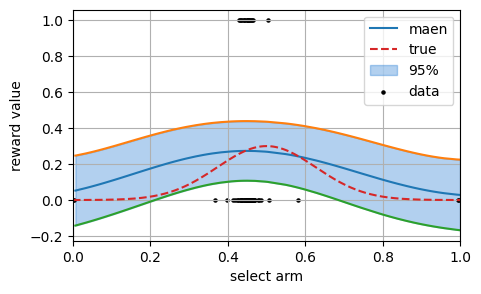

In [232]:
p_train_func = TrueFunc(sigma, f_max, True).peak_one
plot.gp(model, p_train_func, train, reward, titel = "")

In [ ]:
column=['alpha','beta','noise', 'reward']

df = pd.DataFrame(data, columns=column)



reward = [r[2] for r in data]
R = np.array(reward).reshape(-1, len(B)).tolist()
df_r = pd.DataFrame(R,  index=SIGMA, columns=B)
csv_name = "bandit = UCB: " + "S="+ str(S) + "T="+ str(traial) + ".csv"
dir_name = 'results/csv/gp_ucb'+ str(dir_S)
df_r.to_csv(str(dir_name) + '/' + str(csv_name))